<h1>Research of Real Estate</h1>

At our disposal is the data of Yandex.Real Estate - an archive of advertisements on the sale of apartments in St. Petersburg and neighboring localities for several years. You need to learn how to determine the market value of real estate objects. Your task is to set the parameters. This will help to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first is entered by the user, the second is automatically obtained on the basis of map data. For example, the distance to the center, the airport, the nearest park and nearby ponds.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns


<h1>Let us have a look at the datatypes, data itself, unique values</h1>

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
for column in df.columns:
    print(column)
    print(df[column].unique())

total_images
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
last_price
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
total_area
[108.    40.4   56.   ...  66.86 133.81  76.75]
first_day_exposition
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
rooms
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
ceiling_height
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54

In [4]:
total_indexes = df.shape[0]
for column in df.columns:
    na_values = df[column].isna().value_counts()
    print('the ammount of missing values in' , column, ': ', total_indexes - na_values)
    


the ammount of missing values in total_images :  False    0
Name: total_images, dtype: int64
the ammount of missing values in last_price :  False    0
Name: last_price, dtype: int64
the ammount of missing values in total_area :  False    0
Name: total_area, dtype: int64
the ammount of missing values in first_day_exposition :  False    0
Name: first_day_exposition, dtype: int64
the ammount of missing values in rooms :  False    0
Name: rooms, dtype: int64
the ammount of missing values in ceiling_height :  False     9195
True     14504
Name: ceiling_height, dtype: int64
the ammount of missing values in floors_total :  False       86
True     23613
Name: floors_total, dtype: int64
the ammount of missing values in living_area :  False     1903
True     21796
Name: living_area, dtype: int64
the ammount of missing values in floor :  False    0
Name: floor, dtype: int64
the ammount of missing values in is_apartment :  True      2775
False    20924
Name: is_apartment, dtype: int64
the ammount 

In [5]:
for column in df.columns:
    print(df[column].isna().value_counts())

False    23699
Name: total_images, dtype: int64
False    23699
Name: last_price, dtype: int64
False    23699
Name: total_area, dtype: int64
False    23699
Name: first_day_exposition, dtype: int64
False    23699
Name: rooms, dtype: int64
False    14504
True      9195
Name: ceiling_height, dtype: int64
False    23613
True        86
Name: floors_total, dtype: int64
False    21796
True      1903
Name: living_area, dtype: int64
False    23699
Name: floor, dtype: int64
True     20924
False     2775
Name: is_apartment, dtype: int64
False    23699
Name: studio, dtype: int64
False    23699
Name: open_plan, dtype: int64
False    21421
True      2278
Name: kitchen_area, dtype: int64
False    12180
True     11519
Name: balcony, dtype: int64
False    23650
True        49
Name: locality_name, dtype: int64
False    18157
True      5542
Name: airports_nearest, dtype: int64
False    18180
True      5519
Name: cityCenters_nearest, dtype: int64
False    18181
True      5518
Name: parks_around3000, dtype:

In [6]:
df['studio'].value_counts()


False    23550
True       149
Name: studio, dtype: int64

In [7]:
df[df['rooms']==1]['studio'].value_counts()

False    8036
True       11
Name: studio, dtype: int64

In [8]:
df[df['rooms']==0]['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

<h2>The data types that we have:</h2>
<ul><li>Categorical: locality_name.</li>
<li>Numerical: total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_nearest, ponds_around3000, days_exposition.</li>
<li>Boolean: is_apartment, studio, open_plan.</li></ul>

<h2>Let us determine the possible issues with the data:</h2>
<ol>the values in <b>"rooms"</b> 1 or 0 when positioning a flat as a studio. So the author might have not stated the number of rooms, because he stated the type of the flat as a studio (studio == 1 room)
    Values False in <b>df['studio']</b> when the number of rooms = 0: comes from the issue, that the author didnt state the number of rooms</ol>

In [9]:
df['rooms'] = df['rooms'].replace(0,1)
df['rooms'].isna().value_counts()

False    23699
Name: rooms, dtype: int64

In [10]:
df[df['kitchen_area'] + df['living_area'] > df['total_area']]
#drop invalid values

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,NaN,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,NaN,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,NaN,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


In [11]:
bad_sum_area =  df.query('(kitchen_area + living_area ) > total_area ')
len(bad_sum_area)

64

<h3> The values where the sum of <b> kitchen area and living area </b> exceed the ammount total area will treat as a not valid, and therefore get rid of them

In [12]:
bad_index = bad_sum_area.index
print(bad_index)

df.drop(bad_index, inplace=True)
df.loc[180:190, :]

Int64Index([  184,   545,   551,   601,   696,  1060,  1155,  1354,  1407,
             1854,  1992,  2950,  3426,  3891,  4366,  5096,  6557,  6559,
             6802,  7239,  7398,  7680,  7755,  8211,  9333,  9385,  9834,
            10652, 10696, 10725, 10913, 11046, 11150, 11158, 11313, 11472,
            11579, 11594, 12159, 12482, 12530, 12587, 13428, 15513, 16325,
            16598, 16911, 17110, 17151, 17492, 18455, 19344, 19535, 19908,
            20034, 20490, 21266, 21377, 21519, 21824, 21868, 21915, 21956,
            23202],
           dtype='int64')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
180,11,3850000.0,31.7,2018-08-02T00:00:00,1,2.5,5.0,17.9,2,NaN,...,5.6,2.0,Санкт-Петербург,10709.0,10933.0,0.0,NaN,0.0,NaN,8.0
181,2,7900000.0,71.8,2017-08-23T00:00:00,3,3.0,5.0,38.7,1,NaN,...,12.0,NaN,Санкт-Петербург,22036.0,3301.0,0.0,NaN,1.0,585.0,NaN
182,16,3400000.0,60.0,2017-10-10T00:00:00,3,2.5,5.0,44.1,1,NaN,...,6.0,NaN,Красное Село,26090.0,29514.0,0.0,NaN,0.0,NaN,98.0
183,9,3000000.0,43.8,2017-02-16T00:00:00,2,2.7,5.0,27.7,2,NaN,...,5.5,0.0,посёлок Понтонный,31458.0,33170.0,0.0,NaN,0.0,NaN,246.0
185,8,8500000.0,49.9,2018-10-20T00:00:00,1,3.0,16.0,18.9,14,NaN,...,10.6,NaN,Санкт-Петербург,12114.0,8946.0,1.0,749.0,1.0,833.0,145.0
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.8,4,NaN,...,12.0,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
187,9,4300000.0,52.3,2017-10-06T00:00:00,2,NaN,12.0,29.8,4,NaN,...,10.9,NaN,Санкт-Петербург,32794.0,13643.0,0.0,NaN,0.0,NaN,69.0
188,15,4600000.0,38.5,2019-04-16T00:00:00,1,2.5,12.0,18.5,5,NaN,...,NaN,NaN,Санкт-Петербург,49065.0,16735.0,1.0,501.0,0.0,NaN,NaN
189,0,6150000.0,62.0,2017-10-13T00:00:00,3,NaN,9.0,41.5,5,NaN,...,8.5,2.0,Санкт-Петербург,41954.0,12168.0,1.0,10.0,0.0,NaN,45.0
190,4,5200000.0,62.8,2016-06-01T00:00:00,3,NaN,9.0,39.7,2,NaN,...,9.7,0.0,Санкт-Петербург,12988.0,15579.0,0.0,NaN,2.0,898.0,233.0


4     10
6      9
8      8
12     6
9      5
21     4
5      4
7      4
3      4
19     3
11     3
13     3
1      3
18     3
15     3
10     3
24     2
2      2
20     2
14     2
22     1
17     1
23     1
Name: floor, dtype: int64


<AxesSubplot: >

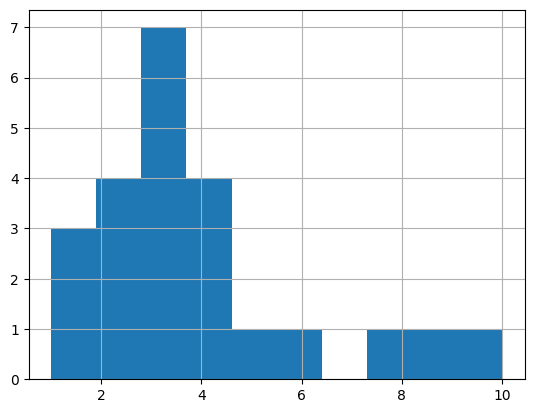

In [13]:
print(df[df['floors_total'].isna()]['floor'].value_counts())
df['floors_total'].value_counts()
df[df['floors_total'].isna()]['floor'].value_counts().hist()

In [14]:
print(df['floors_total'].value_counts())

5.0     5776
9.0     3756
16.0    1368
12.0    1358
4.0     1199
10.0    1172
25.0    1070
6.0      911
17.0     830
3.0      665
7.0      590
14.0     552
18.0     501
24.0     465
8.0      390
2.0      382
15.0     365
23.0     352
19.0     338
22.0     286
20.0     271
13.0     227
11.0     202
27.0     163
21.0     158
26.0     124
1.0       25
35.0      23
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64


<h2>
Buildings with a stated floor number and the absence of the last floor most likely indicate that the seller stated the last floor where his flat is. The analysis shows, that all the values with NaN show up in the sample of the max number of floors for each given building</h2>

In [15]:

df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'].isna().value_counts()

False    23635
Name: floors_total, dtype: int64

In [16]:
def fill_rows(row):
    if row[6] == 0:
        row[6] == row[8]
    return row
df.apply(fill_rows, axis=1)
df['floors_total'].isna().value_counts()

False    23635
Name: floors_total, dtype: int64

In [17]:
df.floor.isna().value_counts()

False    23635
Name: floor, dtype: int64

<h3> Move on to the <b> ceiling height </b> column, we are going to fill the missing values with the median, for it is safe to say that these flats do not differ significantly

In [18]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].describe()[5]
df['ceiling_height'].isna().value_counts()

False    23635
Name: ceiling_height, dtype: int64

let us determine the <b>mean</b> and <b>median</b> of the living area

In [19]:
living_area_ratio_mean = (df['living_area'] / df['total_area']).mean()
living_area_ratio_median = (df['living_area'] / df['total_area']).median()
print(living_area_ratio_mean, living_area_ratio_median, living_area_ratio_mean/living_area_ratio_median)

0.5639669136318227 0.5674418604651164 0.9938761182855891


In [20]:
df['living_area'].isna().value_counts()

False    21732
True      1903
Name: living_area, dtype: int64

<h1>lets build a linear regression to see how living area is dependent on total area</h1>

<h3>we will use a function that determines the regression coefficient by minimising the residual value</h3>

In [21]:
from scipy.optimize import minimize

living_area_notna = df[df['living_area'].notna()].reset_index(drop=True)

def error_function(w):
    sum = 0
    for i in range(len(living_area_notna)):
        sum += (living_area_notna.loc[i, 'living_area'] - (w[0] + w[1] * living_area_notna.loc[i, 'total_area'])) ** 2
    return sum



In [22]:
result = minimize(error_function, np.array([0, 0]))
result


      fun: 1227176.931038619
 hess_inv: array([[ 1.11652541e-04, -1.42252813e-06],
       [-1.42252813e-06,  2.28727875e-08]])
      jac: array([-0.125  ,  0.28125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 149
      nit: 7
     njev: 46
   status: 2
  success: False
        x: array([-1.43539358,  0.59669897])

In [23]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


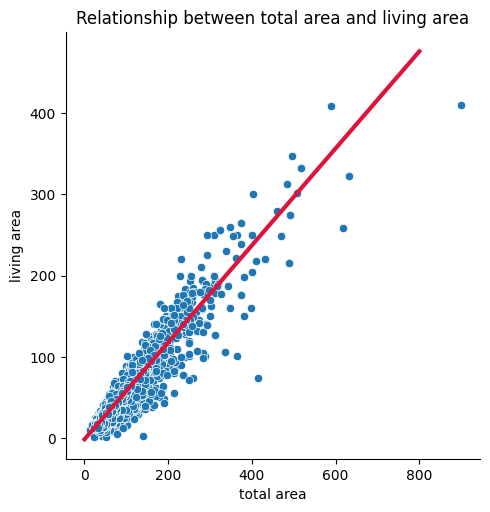

In [24]:
def linear_function(w0, w1, x):
    return (w0 + w1 * x)

#sns.relplot(x='total_area', y='living_area', data=data)
sns.relplot(x='total_area', y='living_area', data=df)

total_area = np.linspace(0, 800)
line = plt.plot(total_area, linear_function(result.x[0], result.x[1], total_area), color='crimson', linewidth=3)
plt.title('Relationship between total area and living area')
plt.xlabel('total area')
plt.ylabel('living area')
plt.show()

<b>Living area depends on total area very much</b> , we will fill up the NaN values in this column based on our regression coefficients

In [25]:
df.loc[df['living_area'].isna(), 
         'living_area'] = result.x[0] + result.x[1] * df.loc[df['living_area'].isna(), 'total_area']

df['living_area'].isna().value_counts()

False    23635
Name: living_area, dtype: int64

<h1>lets build the same linear regression, this time for kitchen, to see how kitchen area is dependent upon total area</h1>

In [26]:
from scipy.optimize import minimize

kitchen_area_notna = df[df['kitchen_area'].notna()].reset_index(drop=True)

def error_function_kitchen(w):
    sum = 0
    for i in range(len(kitchen_area_notna)):
        sum += (kitchen_area_notna.loc[i, 'kitchen_area'] - (w[0] + w[1] * kitchen_area_notna.loc[i, 'total_area'])) ** 2
    return sum

In [27]:
result1 = minimize(error_function_kitchen, np.array([0, 0]))
result1

      fun: 464502.38322491845
 hess_inv: array([[ 1.24666196e-04, -1.97265268e-06],
       [-1.97265268e-06,  3.32929442e-08]])
      jac: array([0.05078125, 1.26171875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 177
      nit: 6
     njev: 56
   status: 2
  success: False
        x: array([4.31361801, 0.10272704])

In [28]:
#sns.relplot(x='total_area', y='kitchen_area', data=df)

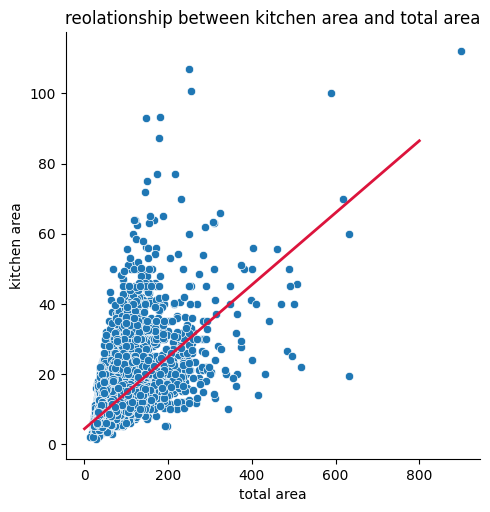

In [29]:
def linear_function(w0, w1, x):
    return (w0 + w1 * x)

# Изобразим решение на графике
#sns.relplot(x='total_area', y='living_area', data=data)
sns.relplot(x='total_area', y='kitchen_area', data=df)

#total_area = np.linspace(0, 800)
line = plt.plot(total_area, linear_function(result1.x[0], result1.x[1], total_area), color='crimson', linewidth=2)
plt.title('reolationship between kitchen area and total area')
plt.xlabel('total area')
plt.ylabel('kitchen area')
plt.show()

<h3>Kitchen area doesnt seem to be grealy dependent on the ammount of total square meters</h3>
<span style=color:'red'>Let us fill the NaN values using the mean of kitchen area</span>

In [30]:
df.query('locality_name == "Санкт-Петербург"')['living_area'].describe()
#na_living_area = df.loc[df['living_area'].isna()]
#na_living_area['total_area']
#df['living_area'] = result.x[0] + result.x[1] * na_living_area['total_area']

count    15682.000000
mean        37.209942
std         25.376231
min          2.000000
25%         20.000000
50%         31.300000
75%         44.122500
max        409.700000
Name: living_area, dtype: float64

In [31]:
#df['living_area'].fillna(fill_na_living_area)

In [32]:
#df['living_area'] = df['living_area'].fillna(0)
#def fill_living_area(row):
    #if row[7] == 0:
        #row[7] = float(format(row[2] * living_area_ratio_mean, '.2f'))
    #return row
#df.apply(fill_living_area, axis=1)
#df['living_area'].isna().value_counts()

In [33]:
df['living_area']

0        51.000000
1        18.600000
2        34.300000
3        93.439743
4        32.000000
           ...    
23694    73.300000
23695    38.000000
23696    29.700000
23697    44.361253
23698    12.300000
Name: living_area, Length: 23635, dtype: float64

In [34]:
kitchen_area_ratio_mean = (df['kitchen_area'] / df['total_area']).mean()
kitchen_area_ratio_median = (df['kitchen_area'] / df['total_area']).median()
print(kitchen_area_ratio_mean, kitchen_area_ratio_median, kitchen_area_ratio_mean/kitchen_area_ratio_median)

0.18698836498068594 0.17213114754098363 1.0863133584592228


In [35]:
df.loc[12]

total_images                             10
last_price                        3890000.0
total_area                             54.0
first_day_exposition    2016-06-30T00:00:00
rooms                                     2
ceiling_height                         2.65
floors_total                            5.0
living_area                            30.0
floor                                     5
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            9.0
balcony                                 0.0
locality_name                     Сертолово
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                        90.0
Name: 12, dtype: object

we define normal size of <b>kitchen area</b> as 5 square meters

In [36]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)
def fill_kitchen_area(row):
    if row[12] == 0:
        normal_kitchen = float(format(row[2] * kitchen_area_ratio_mean, '.2f'))
        if row[12]>5:
            row[12] = normal_kitchen 
        if row[12] <= 5:
            row[12] = 5
df.apply(fill_kitchen_area, axis=1)
df['kitchen_area'].isna().value_counts()
        

False    23635
Name: kitchen_area, dtype: int64

<h3>Let us fill the NaN values of days of exposition with the median value, just like we did with the kitchen. The data might habe been collected poorly and some values might have been lost. Think, to simply get rid of 15 percent of data would be a waste</h3>

In [37]:
df['days_exposition'].isna().value_counts()


False    20462
True      3173
Name: days_exposition, dtype: int64

In [38]:
ratio = 3173 / 20462
print('{:.2%}'.format(ratio))

15.51%


In [39]:
df['days_exposition'].describe()

count    20462.000000
mean       180.956212
std        219.792706
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [40]:
df.loc[df['days_exposition'].isna(), 'days_exposition'] = df['days_exposition'].describe()[5]

In [41]:
df['days_exposition'].isna().value_counts()

False    23635
Name: days_exposition, dtype: int64

<h3>Fill NaN with False, because the missing values in this column tell us that its a regular flat</h3>

In [42]:
df['is_apartment'] = df['is_apartment'].fillna(False)

df['is_apartment'].isna().value_counts()

False    23635
Name: is_apartment, dtype: int64

In [43]:
df['is_apartment']

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23635, dtype: bool

<h3>Fill nan values here with zeroes, because the absence of value in this columns tells that there is most likely 0 balconies</h3>

In [44]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().value_counts()

False    23635
Name: balcony, dtype: int64

In [45]:
df['locality_name'].value_counts()
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

We see that duplicates take place in amongst cities like <b> Мурино</b> и <b>посёлок Мурино</b> which are the same

In [46]:
import copy
df1 = copy.deepcopy(df)
bad_locality_name = df1[df1['locality_name'].isna()]
bad_locality_name


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.800000,2,False,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,2.65,4.0,42.600000,2,False,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.65,24.0,15.600000,3,False,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.65,24.0,33.100000,21,False,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.65,5.0,30.800000,5,False,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.620000,7,False,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.300000,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,2.65,7.0,48.090621,6,False,...,0.00,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,2.65,7.0,59.100000,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.65,24.0,20.000000,23,False,...,0.00,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [47]:
len(bad_locality_name)
bad_locality_name = bad_locality_name.index
df1.drop(bad_locality_name, inplace=True)

In [48]:
#df1.drop(bad_locality_name, inplace=True)
df1['locality_name']

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23586, dtype: object

In [49]:
df1['locality_name'] = df1['locality_name'].astype(str)
def make_short_city_name(row):
    new_name = row.split()
    names = []
    for word in new_name:
        if word[0].isupper():
            names.append(word)
        
    names = ' '.join(word for word in names)
    return names


df1['locality_name_short'] = df1['locality_name'].apply(make_short_city_name)

In [50]:
short_locality_name_keys = df1['locality_name_short'].unique()
short_locality_name_keys

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [51]:
#df1['locality_name'].isna().value_counts()
for column in df.columns:
    print(df[column].isna().value_counts())

False    23635
Name: total_images, dtype: int64
False    23635
Name: last_price, dtype: int64
False    23635
Name: total_area, dtype: int64
False    23635
Name: first_day_exposition, dtype: int64
False    23635
Name: rooms, dtype: int64
False    23635
Name: ceiling_height, dtype: int64
False    23635
Name: floors_total, dtype: int64
False    23635
Name: living_area, dtype: int64
False    23635
Name: floor, dtype: int64
False    23635
Name: is_apartment, dtype: int64
False    23635
Name: studio, dtype: int64
False    23635
Name: open_plan, dtype: int64
False    23635
Name: kitchen_area, dtype: int64
False    23635
Name: balcony, dtype: int64
False    23586
True        49
Name: locality_name, dtype: int64
False    18113
True      5522
Name: airports_nearest, dtype: int64
False    18136
True      5499
Name: cityCenters_nearest, dtype: int64
False    18137
True      5498
Name: parks_around3000, dtype: int64
True     15574
False     8061
Name: parks_nearest, dtype: int64
False    18137
True

</h1>We have cleaned the data, and got rid of most NaN in the respective columns, leave cleansing of other columns for later, in order not to lose some data</h1>
<h1>We cleaned the next columns:</h1>
   <h2><ol>
        <li><b>rooms</b> (replaced 0 to 1 if the flat is a studio)</li>
        <li><b>living_area</b> (regression analysis)</li>
        <li><b>floors_total</b> (most likely seller stated the last floor and didnt state it the 2nd time)</li>
        <li><b>kitchen_area</b> (median values)</li>
        <li><b>days_exposition</b> (median values)</li>
        <li><b>is_apartment</b> (filled nan with false)</li>
        <li><b>balcony</b>( filled nan with zeroes)</li>
        going to fill <b>cityCenters_nearest</b> in the next step
    </ol></h2>

<h1>CHAPTER 2</h1>

<h2> Now we should see how far the apartments are located from the centre of Saint's Petersburg on average</h2>

In [52]:
locality_and_cityCenter_dict = {}

def make_locality_and_cityCenter_dict(data_frame):
    for name in short_locality_name_keys:
        mean = data_frame[data_frame['locality_name_short'] == name]['cityCenters_nearest'].mean()
        locality_and_cityCenter_dict[name] = mean
        
make_locality_and_cityCenter_dict(df1)
locality_and_cityCenter_dict

{'Санкт-Петербург': 11598.968631969785,
 'Шушары': 24256.301149425286,
 'Янино-1': nan,
 'Парголово': 19927.920245398775,
 'Мурино': 21888.0,
 'Ломоносов': 50739.969696969696,
 'Сертолово': nan,
 'Петергоф': 35490.615,
 'Пушкин': 28745.375,
 'Кудрово': nan,
 'Коммунар': nan,
 'Колпино': 32108.282738095237,
 'Красный Бор': nan,
 'Гатчина': nan,
 'Фёдоровское': nan,
 'Выборг': nan,
 'Кронштадт': 49195.72631578947,
 'Кировск': nan,
 'Новое Девяткино': nan,
 'Металлострой': 27561.348484848484,
 'Лебяжье': nan,
 'Сиверский': nan,
 'Молодцово': nan,
 'Кузьмоловский': nan,
 'Новая Ропша': nan,
 'Павловск': 33206.92105263158,
 'Пикколово': nan,
 'Всеволожск': nan,
 'Волхов': nan,
 'Кингисепп': nan,
 'Приозерск': nan,
 'Сестрорецк': 34620.994505494506,
 'Куттузи': nan,
 'Аннино': nan,
 'Ефимовский': nan,
 'Плодовое': nan,
 'Заклинье': nan,
 'Торковичи': nan,
 'Первомайское': nan,
 'Красное Село': 30020.284090909092,
 'Понтонный': 32293.45,
 'Сясьстрой': nan,
 'Старая': nan,
 'Лесколово': nan,
 

<h3>Too many NaN values, let us determine in which indices they appear and delete them</h3>

In [53]:
bad_citycenter_info = df1[df1['cityCenters_nearest'].isna()]
bad_citycenter_info
bad_citycenter_info_index = bad_citycenter_info.index
df1.drop(bad_citycenter_info_index, inplace=True)

In [54]:
for column in df.columns:
    print(df[column].isna().value_counts())

False    23635
Name: total_images, dtype: int64
False    23635
Name: last_price, dtype: int64
False    23635
Name: total_area, dtype: int64
False    23635
Name: first_day_exposition, dtype: int64
False    23635
Name: rooms, dtype: int64
False    23635
Name: ceiling_height, dtype: int64
False    23635
Name: floors_total, dtype: int64
False    23635
Name: living_area, dtype: int64
False    23635
Name: floor, dtype: int64
False    23635
Name: is_apartment, dtype: int64
False    23635
Name: studio, dtype: int64
False    23635
Name: open_plan, dtype: int64
False    23635
Name: kitchen_area, dtype: int64
False    23635
Name: balcony, dtype: int64
False    23586
True        49
Name: locality_name, dtype: int64
False    18113
True      5522
Name: airports_nearest, dtype: int64
False    18136
True      5499
Name: cityCenters_nearest, dtype: int64
False    18137
True      5498
Name: parks_around3000, dtype: int64
True     15574
False     8061
Name: parks_nearest, dtype: int64
False    18137
True

<h1>As our 3rd step we will add the next values in the data:</h1>
<ol><li>
    price for square meter;</li>
<li>weekday, month and a year of when the flat was put on sale;</li>
<li>type of floor: types — <b>First, Last, Other</b> ;</li>
    <li>ratio of <b>living area</b> and <b>total area</b> , as well as ration of <b>kitchen_area and total area</b> </li></ol>

In [55]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
#df['day'] = pd.date_range(df['first_day_exposition'].min(),df['first_day_exposition'].max(), freq='D').to_series()
#df['day'].dt.dayofweek
df['weekday'] = df['first_day_exposition'].dt.weekday
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,weekday
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019,3,3
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,93.439743,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015,7,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0,2017,3,1
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2018,1,0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,2018,2,6
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,44.361253,12,False,...,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,2017,3,1


In [56]:
df['last_price'] = pd.to_numeric(df['last_price'], downcast='integer')
df['floors_total'] = pd.to_numeric(df['floors_total'], downcast='integer')
df['balcony'] = pd.to_numeric(df['balcony'], downcast='integer')
df['airports_nearest'] = pd.to_numeric(df['airports_nearest'], downcast='integer')
df['cityCenters_nearest'] = pd.to_numeric(df['cityCenters_nearest'], downcast='integer')
df['parks_nearest'] = pd.to_numeric(df['parks_nearest'], downcast='integer')
df['ponds_nearest'] = pd.to_numeric(df['ponds_nearest'], downcast='integer')
df['parks_around3000'] = pd.to_numeric(df['parks_around3000'], downcast='integer')
df['ponds_around3000'] = pd.to_numeric(df['ponds_around3000'], downcast='integer')
df['days_exposition'] = pd.to_numeric(df['days_exposition'], downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23635 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23635 non-null  int64         
 1   last_price            23635 non-null  int32         
 2   total_area            23635 non-null  float64       
 3   first_day_exposition  23635 non-null  datetime64[ns]
 4   rooms                 23635 non-null  int64         
 5   ceiling_height        23635 non-null  float64       
 6   floors_total          23635 non-null  int8          
 7   living_area           23635 non-null  float64       
 8   floor                 23635 non-null  int64         
 9   is_apartment          23635 non-null  bool          
 10  studio                23635 non-null  bool          
 11  open_plan             23635 non-null  bool          
 12  kitchen_area          23635 non-null  float64       
 13  balcony         

In [57]:
df['price_per_sqmetre'] = df['last_price'] / df['total_area']
df['price_per_sqmetre'].round(2)

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_per_sqmetre, Length: 23635, dtype: float64

In [58]:
def categorize_floor(row):
    if row[8] == 1:
        return 'First'
    elif row[8] == row[6]:
        return 'Last'
    else:
        return 'Other'
    
df['floor_category'] = df.apply(categorize_floor,axis=1)
df['floor_category'].value_counts() 

Other    17400
Last      3322
First     2913
Name: floor_category, dtype: int64

In [59]:
df['ratio_living_area_to_total'] = df['living_area'] / df['total_area']
#df['ratio_living_area_to_total'].isna().value_counts()

In [60]:
df['ratio_kitchen_area_to_total'] = df['kitchen_area'] / df['total_area']
#df['ratio_kitchen_area_to_total'].isna().value_counts()

<h3> Let us delete the duplicates</h3>

In [61]:
old_df = df.shape[0]
df.drop_duplicates()
df.info()
print('The total ammount of values before processing:',old_df)
print('the total ammount after:',df.shape[0])
print('percent of deleted values', '{:.2%}'.format((old_df - df.shape[0])/old_df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23635 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 23635 non-null  int64         
 1   last_price                   23635 non-null  int32         
 2   total_area                   23635 non-null  float64       
 3   first_day_exposition         23635 non-null  datetime64[ns]
 4   rooms                        23635 non-null  int64         
 5   ceiling_height               23635 non-null  float64       
 6   floors_total                 23635 non-null  int8          
 7   living_area                  23635 non-null  float64       
 8   floor                        23635 non-null  int64         
 9   is_apartment                 23635 non-null  bool          
 10  studio                       23635 non-null  bool          
 11  open_plan                    23635 non-nu

<h1> Lets conduct the research for the time at which the flat is sold</h1>

<h3> Many villages and small cities do not have the distance from them to the city of Saint-Petersburg

In [62]:


#df['locality_name'] = df['locality_name'].fillna('empty')
#print(df[df['locality_name'] == 'empty']['cityCenters_nearest'].value_counts())


In [63]:
#locality_and_cityCenter_dict = {}
#short_locality_name_keys = df1['locality_name_short'].unique()
#make_locality_and_cityCenter_dict(df1)
#print(locality_and_cityCenter_dict)

#SP_flats_sales_data = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.isna()')
#SP_flats_sales_data['cityCenters_nearest'].isna().value_counts()

In [64]:
df.loc[12]

total_images                                    10
last_price                                 3890000
total_area                                    54.0
first_day_exposition           2016-06-30 00:00:00
rooms                                            2
ceiling_height                                2.65
floors_total                                     5
living_area                                   30.0
floor                                            5
is_apartment                                 False
studio                                       False
open_plan                                    False
kitchen_area                                   9.0
balcony                                          0
locality_name                            Сертолово
airports_nearest                               NaN
cityCenters_nearest                            NaN
parks_around3000                               NaN
parks_nearest                                  NaN
ponds_around3000               

<h2> Let's denote city center within <b color='red'>15km<b> as center, the others will be marked as "outside"</h2>

In [65]:
#def fill_locality_name(row):
    #fif row[12] == 'empty':
       #if row[14] < 15000:
            #row[12] = 'Санкт-Петербург'
        #else:
            #row[12] = 'За пределами Санкт-Петербурга'
        #return row
#df = df.apply(fill_locality_name, axis=1)


 for the sake of avoiding error in the future we convert the following columns: <span color='blue'><ul>
  <li>'last_price'</li>
<li>'floors_total'</li>
<li>'last_price'</li>
   <li>'balcony'</li>
    <li>'last_price'</li>
    <li>'airports_nearest'</li>
    <li>'cityCenters_nearest'</li>
    <li>'parks_nearest'</li>
    <li>'parks_around3000'</li>
    <li>'ponds_around3000'</li>
    <li>'days_exposition'</li>
</ul></span>
into numeric type

<h1><b><ul><li>Let us now analyse the folowing important parameters: size, price, number of rooms, ceiling height. will build histograms for each of the abovementioned parameters</li>
<li>Then see when the flats, usully, get sold. Will answer the question: 'What are the good time boundaries of a flat being sold?'</li>
    <li>Clean the data. Determine anomalies and make conclusion</li></h1></b></ul>

In [66]:
df['total_area'].describe()

count    23635.000000
mean        60.379893
std         35.685050
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [67]:
def make_hist_for_each_parameter(par, bins=0):
    par_description = par.describe()
    mean = par_description[1]
    std = par_description[2]
    d_min = par_description[3]
    q1 = par_description[4]
    median = par_description[5]
    q3 = par_description[6]
    d_max =  par_description[7]
    iqr = q3-q1
    left_border = q1 - iqr*1.5
    if left_border < d_min:
        left_border = d_min
    right_border = q3 + iqr*1.5
    if right_border > d_max:
        right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    par.hist(bins=bins, range=(left_border, right_border))
    print(par_description)
    return (left_border, right_border)

<AxesSubplot: >

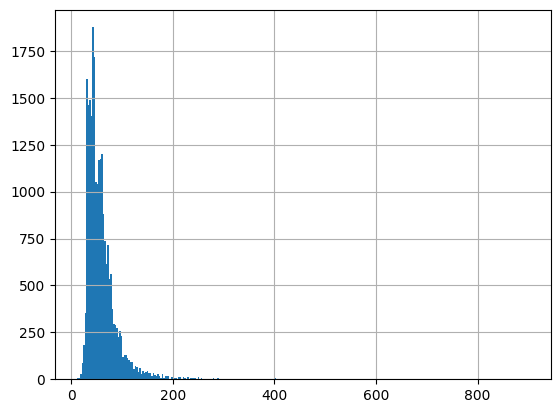

In [68]:
df['total_area'].hist(bins=300)

count    23635.000000
mean        60.379893
std         35.685050
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


(12.0, 115.0)

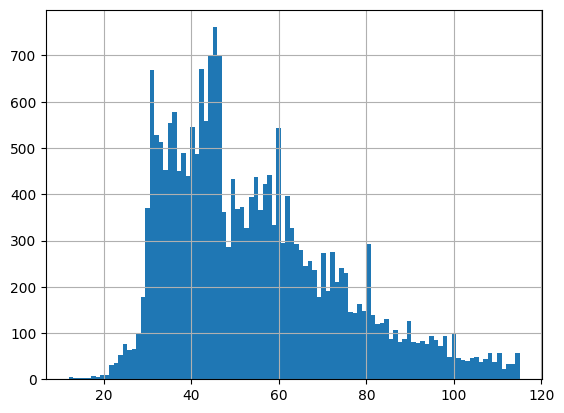

In [69]:
total_area_borders = make_hist_for_each_parameter(df['total_area'])
total_area_borders

Most of the flats range their sizes somewhat between 24 and 63 square meters

<AxesSubplot: >

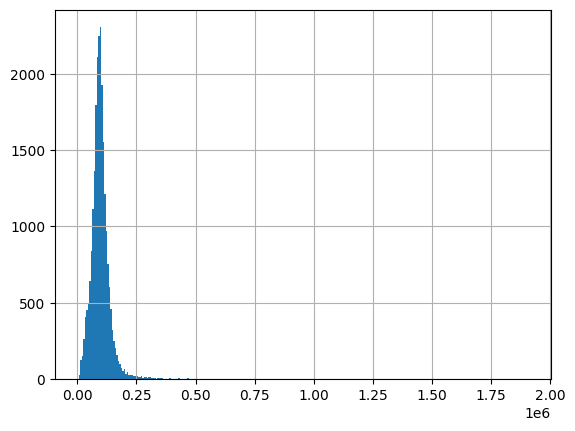

In [70]:
df['price_per_sqmetre'].hist(bins=300)

count    2.363500e+04
mean     9.940788e+04
std      5.034177e+04
min      1.118349e+02
25%      7.657162e+04
50%      9.500000e+04
75%      1.142080e+05
max      1.907500e+06
Name: price_per_sqmetre, dtype: float64


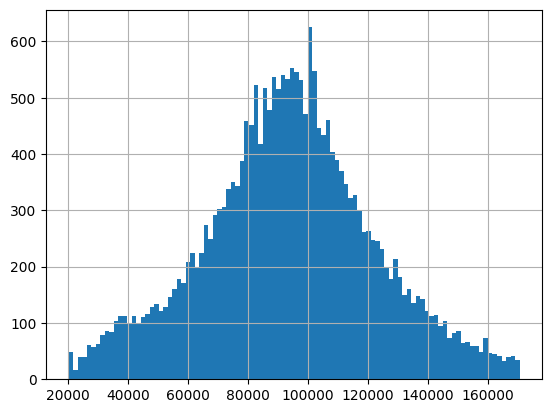

In [71]:

price_per_metre_borders = make_hist_for_each_parameter(df['price_per_sqmetre'])

the most ammount of flats are priced between 65000 and 120000 rubles for a single square meter 

<AxesSubplot: >

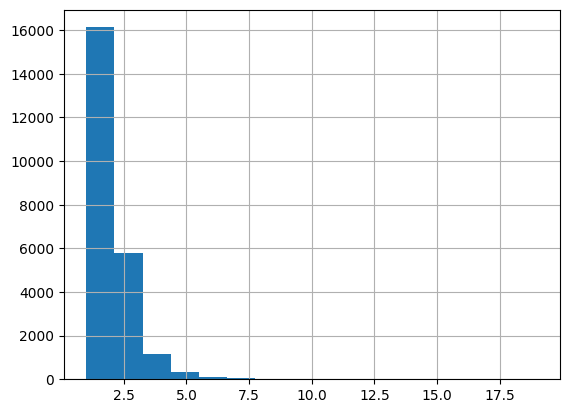

In [72]:
df['rooms'].hist(bins=16)

count    23635.000000
mean         2.080008
std          1.066735
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


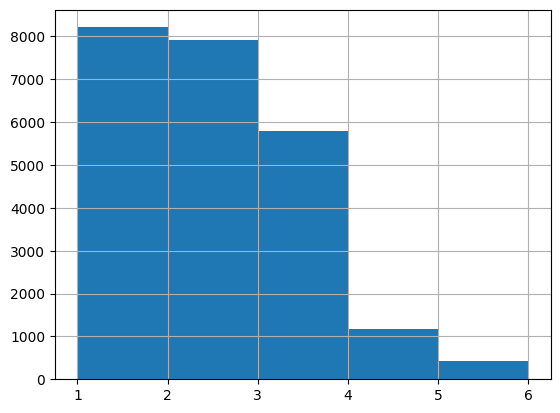

In [73]:

rooms_borders = make_hist_for_each_parameter(df['rooms'])

<b>rooms</b> column looks alright

<AxesSubplot: >

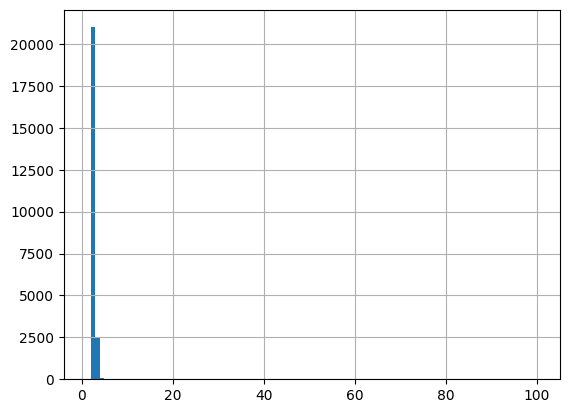

In [74]:
df['ceiling_height'].hist(bins=100)

count    23635.000000
mean         2.722301
std          0.963470
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


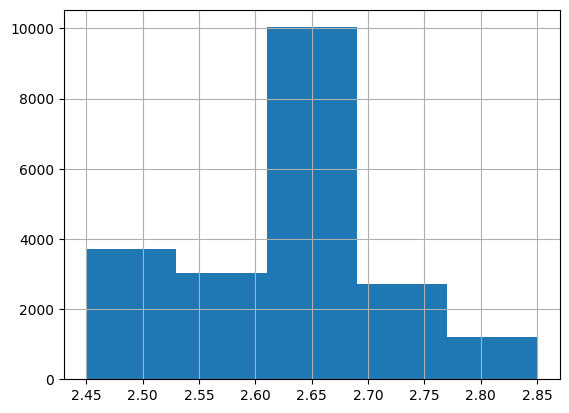

In [75]:
ceiling_height_borders = make_hist_for_each_parameter(df['ceiling_height'])

the <b>ceiling height</b> of most of the flates is therefore between 2.55 and 2.75 square meters

<AxesSubplot: >

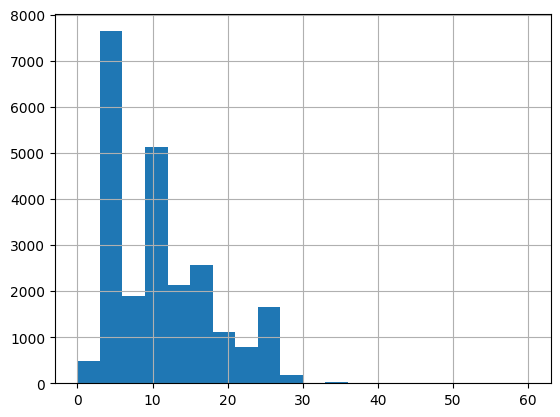

In [76]:
df['floors_total'].hist(bins=20)

count    23635.000000
mean        10.629025
std          6.612381
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


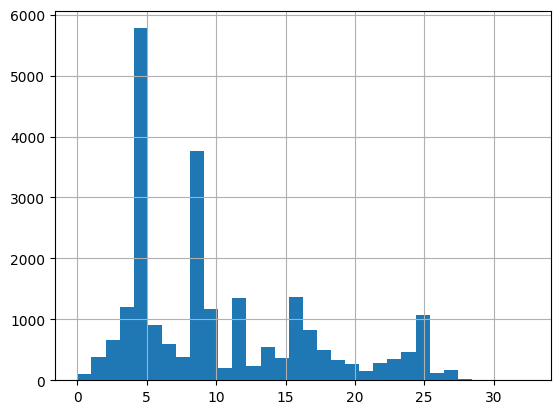

In [77]:
floor_total_borders = make_hist_for_each_parameter(df['floors_total'])


So the majority of flats are placed in buildings where total amount of floors is between 4 and 10

<AxesSubplot: >

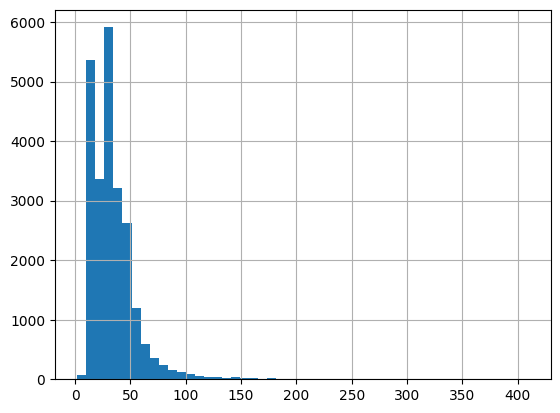

In [78]:
df['living_area'].hist(bins=50)

count    23635.000000
mean        34.593227
std         22.479457
min          2.000000
25%         19.000000
50%         30.000000
75%         42.123632
max        409.700000
Name: living_area, dtype: float64


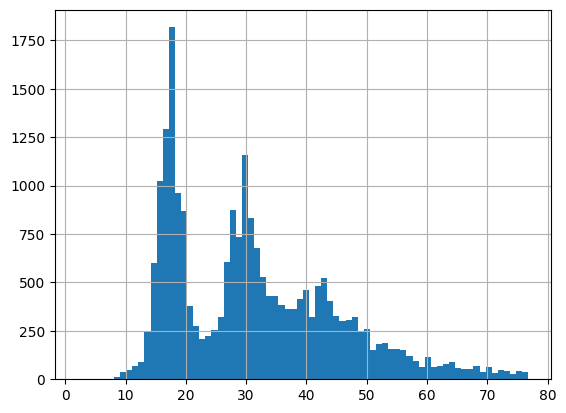

In [79]:
living_area_borders = make_hist_for_each_parameter(df['living_area'])

The majority of flats have space of <b>living area</b> between 14 and 40 square meters

<AxesSubplot: >

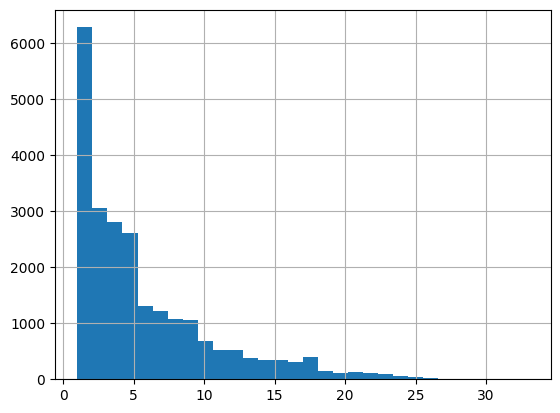

In [80]:
df['floor'].hist(bins=30)

count    23635.000000
mean         5.886905
std          4.881756
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


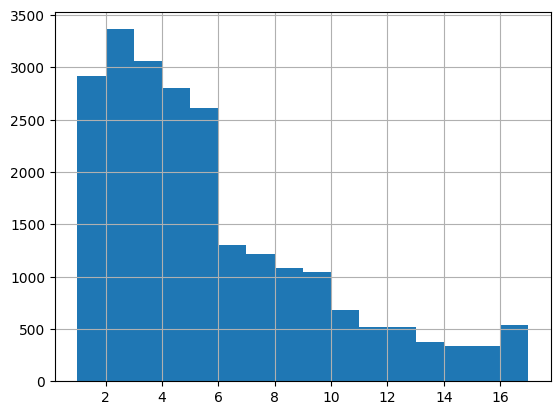

In [81]:
number_of_floor_borders = make_hist_for_each_parameter(df['floor'])

the majority of flats in the data are placed at <b>floors</b> from 2 to 8

<h2> Let us get rid of the throw outs now </h2>

In [82]:
print('the ammount of values before cleaning:', df.shape[0])
df_good_total_area = df.query('@total_area_borders[0] <= total_area < @total_area_borders[1]')
print('the ammount of quality values for total area:', df_good_total_area.shape[0])
df_good_price = df.query('@price_per_metre_borders[0] <= price_per_sqmetre <= @price_per_metre_borders[1]')
print('the ammount of quality values for price per square meter:', df_good_price.shape[0])
df_good_living_area = df.query('@living_area_borders[0] <= living_area <= @living_area_borders[1]')
print('the ammount of quality values for living area:', df_good_living_area.shape[0])

the ammount of values before cleaning: 23635
the ammount of quality values for total area: 22398
the ammount of quality values for price per square meter: 22541
the ammount of quality values for living area: 22744


In [83]:
old_new_len_flats_sales_data = df.shape[0]
df_good = (df
                    .query('@total_area_borders[0] <= total_area <=  @total_area_borders[1]')
                    .query('@price_per_metre_borders[0] <= price_per_sqmetre <= @price_per_metre_borders[1]')
                    .query('@living_area_borders[0] <= living_area <= @living_area_borders[1]')
            )
print('The ammount of values before cleaning:',old_new_len_flats_sales_data)
print('the ammount of values after cleaning:',df_good.shape[0])
print('the percent of delelted values, {:.2%}'.format(
    (old_new_len_flats_sales_data - df_good.shape[0])/old_new_len_flats_sales_data))

The ammount of values before cleaning: 23635
the ammount of values after cleaning: 21608
the percent of delelted values, 8.58%


<h2>We will now analyse the time when the flats get sold</h2>


<AxesSubplot: >

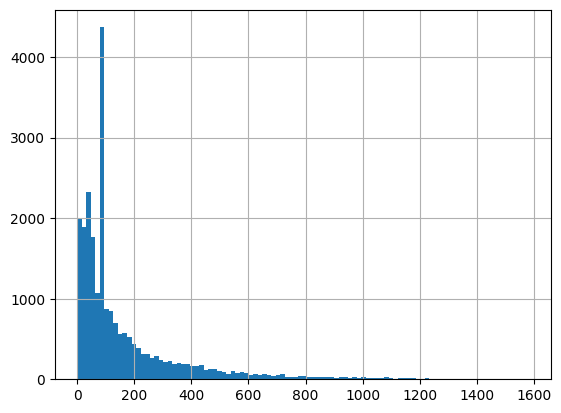

In [84]:
df['days_exposition'].hist(bins=100)

count    23635.000000
mean       169.416586
std        206.595914
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


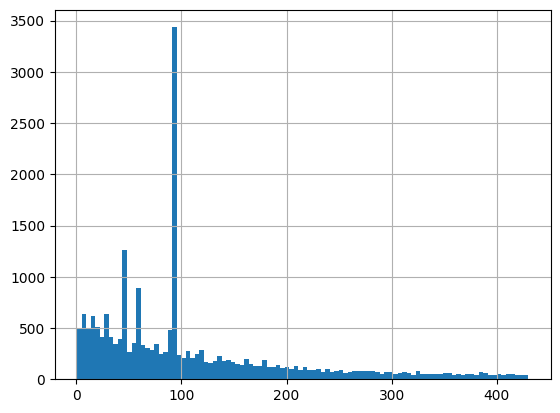

In [85]:
time_of_selling_borders = make_hist_for_each_parameter(df['days_exposition'])

In [86]:
(
    df.query('floor_category == "First"')
    .pivot_table(index='locality_name', values='price_per_sqmetre', aggfunc=['median', 'sum']).sort_values(by='locality_name',ascending=False)
)

,median,sum
,price_per_sqmetre,price_per_sqmetre
locality_name,,
село Старая Ладога,34696.969697,6.939394e+04
село Русско-Высоцкое,58287.981859,1.165760e+05
село Рождествено,44091.710758,4.409171e+04
село Путилово,39921.758208,7.984352e+04
село Павлово,59907.834101,5.990783e+04
...,...,...
Выборг,55405.405405,2.165644e+06
Всеволожск,60526.315789,4.156181e+06


In [87]:
df['days_exposition'].describe()
#df['days_exposition'].hist(bins=60, range=(120,360))

count    23635.000000
mean       169.416586
std        206.595914
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

mean value - 176 days. Median value - 94 days. 2. Let us describe, how long it does usually last, for an appartment to be sold . Commonly, in big russian cities flats get sold in 1-6 months, but it can take up to a year. What we see in our analysis is very common. 3. Let us answer the question: When can we say that the purchase took very fast, and the not...Very fast purchases is an indicator of some fraud. We will get rid of the values of purchases that took 7 days and less, and those, that took more than a year, pretty safe to say, that the mentioned values are irrelevant for current analysis.


count    19920.000000
mean       105.701255
std         80.920417
min          7.000000
25%         45.000000
50%         95.000000
75%        137.000000
max        360.000000
Name: days_exposition, dtype: float64


<AxesSubplot: >

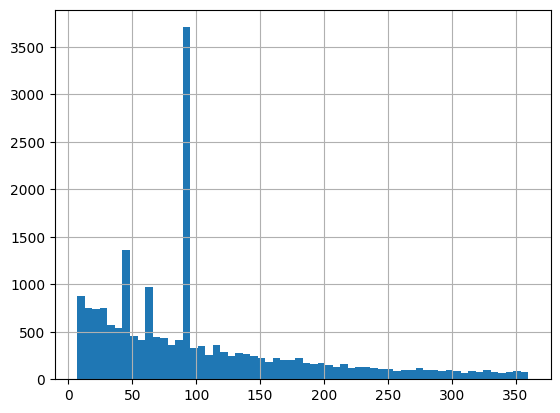

In [88]:
df_by_days_of_exposition = df.query('7 <= days_exposition <= 360')
print(df_by_days_of_exposition['days_exposition'].describe())
df_by_days_of_exposition['days_exposition'].hist(bins=60)

<AxesSubplot: >

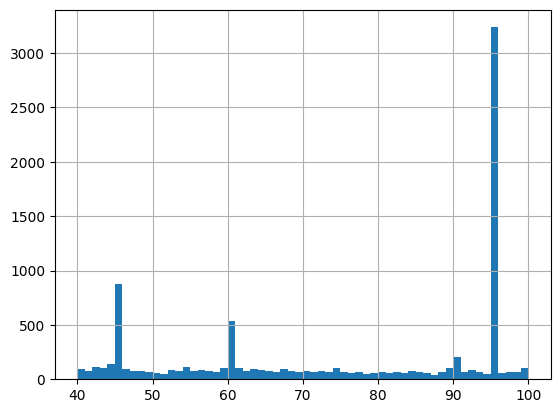

In [89]:
df_by_days_of_exposition['days_exposition'].hist(bins=60, range=(40,100))

In [90]:

old_new_len_flats_sales_data = df.shape[0]
df = df.query('7 <= days_exposition <= @time_of_selling_borders[1]')
print('Number of values before cleaning:',old_new_len_flats_sales_data)
print('Number of values after cleaning:',df.shape[0])
print('Percent of deleted values:', '{:.2%}'.format(
    (old_new_len_flats_sales_data - df.shape[0])/old_new_len_flats_sales_data))

Number of values before cleaning: 23635
Number of values after cleaning: 20704
Percent of deleted values: 12.40%


<h1>Determine how price depends upon, in which floor a flat is located. As well as, how price differs depending on weekday, month and year</h1>

In [91]:
prise_area_rooms_center = df.loc[:,['price_per_sqmetre', 'total_area', 'rooms', 'cityCenters_nearest']]
prise_area_rooms_center

,price_per_sqmetre,total_area,rooms,cityCenters_nearest
0,120370.370370,108.00,3,16028.0
1,82920.792079,40.40,1,18603.0
3,408176.100629,159.00,3,6800.0
4,100000.000000,100.00,2,8098.0
5,95065.789474,30.40,1,NaN
...,...,...,...,...
23693,73717.948718,62.40,3,34104.0
23694,72490.845228,133.81,3,4232.0
23695,52542.372881,59.00,3,NaN
23696,44091.710758,56.70,2,NaN


count      2539.000000
mean      82041.007801
std       39105.372352
min        9615.384615
25%       60813.625304
50%       81355.932203
75%       98532.220770
max      813253.012048
Name: price_per_sqmetre, dtype: float64


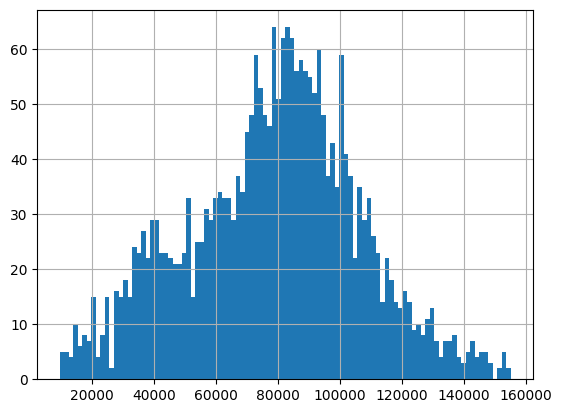

In [92]:
floor_category_borders_first = make_hist_for_each_parameter(df[df['floor_category'] == 'First']['price_per_sqmetre'])


count    2.885000e+03
mean     9.323051e+04
std      6.971401e+04
min      1.118349e+02
25%      6.379310e+04
50%      8.737864e+04
75%      1.081633e+05
max      1.907500e+06
Name: price_per_sqmetre, dtype: float64


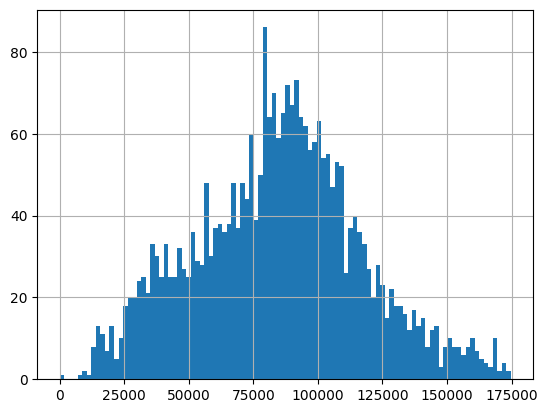

In [93]:
floor_category_borders_last = make_hist_for_each_parameter(df[df['floor_category'] == 'Last']['price_per_sqmetre'])

count    1.528000e+04
mean     1.028396e+05
std      4.619196e+04
min      1.036866e+04
25%      8.101341e+04
50%      9.821429e+04
75%      1.169811e+05
max      1.736842e+06
Name: price_per_sqmetre, dtype: float64


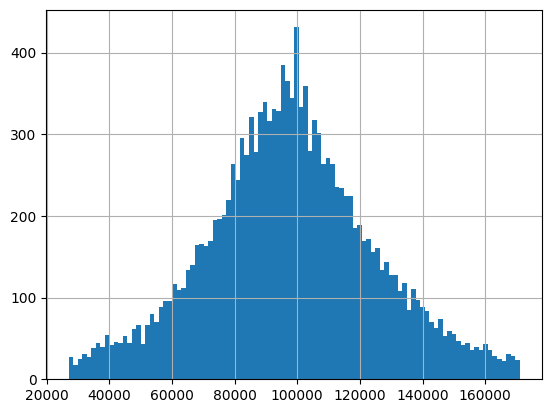

In [94]:
floor_category_borders_last = make_hist_for_each_parameter(df[df['floor_category'] == 'Other']['price_per_sqmetre'])

All in all prices for flats placed at floors different than <b>First</b> and <b>Last</b> cost more, but not much 

<h3>Let's see the relationship between weekday, month, and a year between price per square meter</h3>

In [95]:
prise_weekday_month_year = df.loc[:,['price_per_sqmetre', 'weekday', 'month', 'year']]
prise_weekday_month_year.corr()
#correlation doesn't show much

,price_per_sqmetre,weekday,month,year
price_per_sqmetre,1.000000,-0.010203,-0.007360,0.033542
weekday,-0.010203,1.000000,0.010949,-0.017006
month,-0.007360,0.010949,1.000000,-0.306506
year,0.033542,-0.017006,-0.306506,1.000000


<AxesSubplot: >

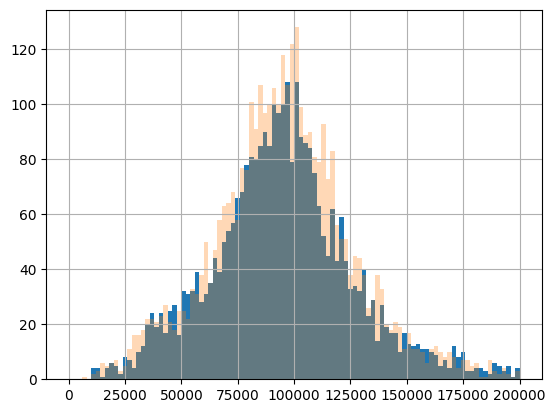

In [96]:
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 0]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 1]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.3)

<AxesSubplot: >

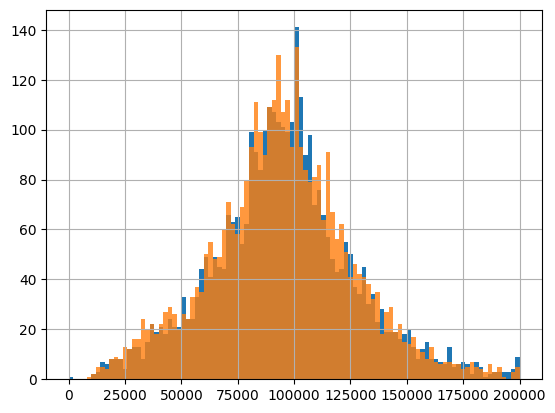

In [97]:
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 2]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 3]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.8)

<AxesSubplot: >

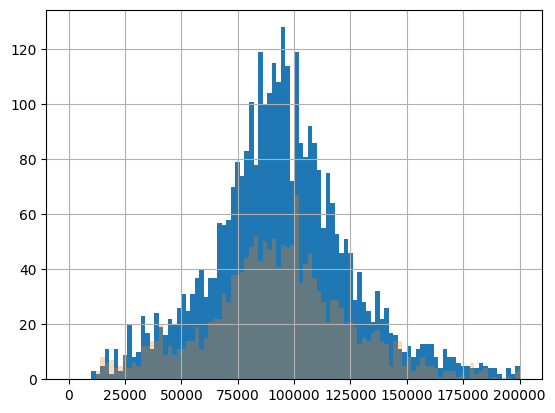

In [98]:
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 4]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 5]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.3)

<AxesSubplot: >

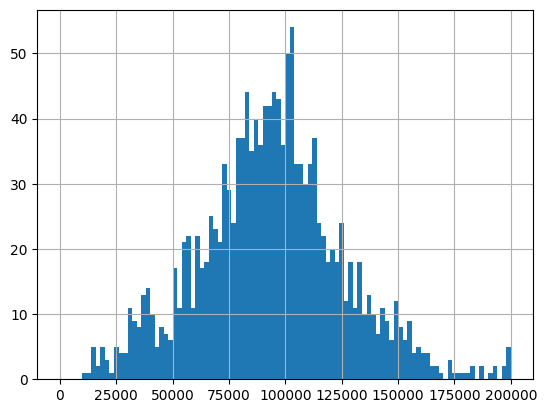

In [99]:
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 6]['price_per_sqmetre'].hist(bins=100, range=(0,200000))

<h3>The price doesnt differ depending on weekdays, the ammount of sold apartments, though, does. Less flats are sold during weekend. That is, because most agencies work during workdays

In [100]:
#(
    #df_ten_biggest.query('cityCenters_nearest >= 10')
    #.pivot_table(index='cityCenters_nearest', values='price_per_sqmeter', aggfunc='median')
    #.plot(grid=True, figsize=(12,6))
    #.plot(kind='scatter', x='locality_name', y='price_per_squaremeter')
#)

count      1310.000000
mean      98216.124547
std       42691.730777
min       12422.360248
25%       75587.759935
50%       95000.000000
75%      113658.133055
max      556792.873051
Name: price_per_sqmetre, dtype: float64
count    2.384000e+03
mean     9.844644e+04
std      4.814049e+04
min      1.018519e+04
25%      7.540483e+04
50%      9.498603e+04
75%      1.136426e+05
max      1.000748e+06
Name: price_per_sqmetre, dtype: float64


<AxesSubplot: >

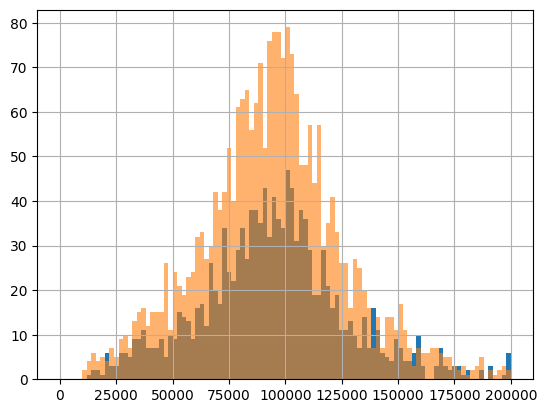

In [101]:
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 1]['price_per_sqmetre'].describe())
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 2]['price_per_sqmetre'].describe())
prise_weekday_month_year[prise_weekday_month_year['month'] == 1]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 2]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.6)


count    2.269000e+03
mean     9.977091e+04
std      5.190153e+04
min      1.118349e+02
25%      7.520891e+04
50%      9.625000e+04
75%      1.172107e+05
max      1.542605e+06
Name: price_per_sqmetre, dtype: float64
count    2.100000e+03
mean     1.022696e+05
std      6.543711e+04
min      1.125000e+04
25%      7.784608e+04
50%      9.676613e+04
75%      1.158641e+05
max      1.736842e+06
Name: price_per_sqmetre, dtype: float64


<AxesSubplot: >

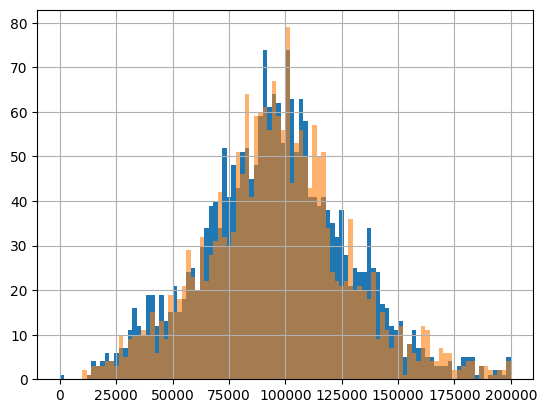

In [102]:
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 3]['price_per_sqmetre'].describe())
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 4]['price_per_sqmetre'].describe())
prise_weekday_month_year[prise_weekday_month_year['month'] == 3]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 4]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.6)

count      1046.000000
mean      97254.919624
std       39254.405320
min       10897.435897
25%       76476.717448
50%       92335.092928
75%      111759.276789
max      460000.000000
Name: price_per_sqmetre, dtype: float64
count      1494.000000
mean      97516.834477
std       49678.050662
min        7962.962963
25%       74013.934813
50%       92353.004407
75%      111093.073593
max      640422.350472
Name: price_per_sqmetre, dtype: float64


<AxesSubplot: >

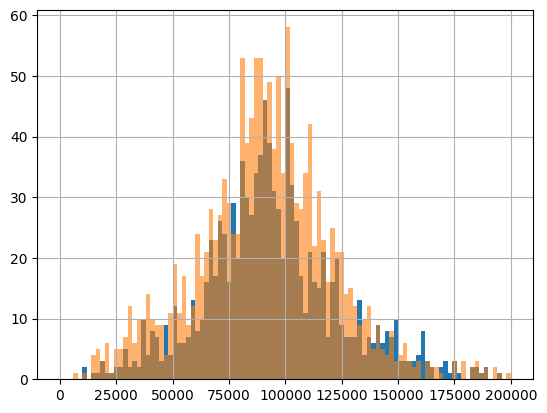

In [103]:
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 5]['price_per_sqmetre'].describe())
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 6]['price_per_sqmetre'].describe())
prise_weekday_month_year[prise_weekday_month_year['month'] == 5]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 6]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.6)

count      1488.000000
mean      99369.416223
std       47209.156646
min       10507.246377
25%       77752.976190
50%       95049.995265
75%      113574.124693
max      634328.358209
Name: price_per_sqmetre, dtype: float64
count      1560.000000
mean      98714.342206
std       40648.183295
min        9615.384615
25%       77972.232819
50%       96026.315789
75%      114516.129032
max      583390.528483
Name: price_per_sqmetre, dtype: float64


<AxesSubplot: >

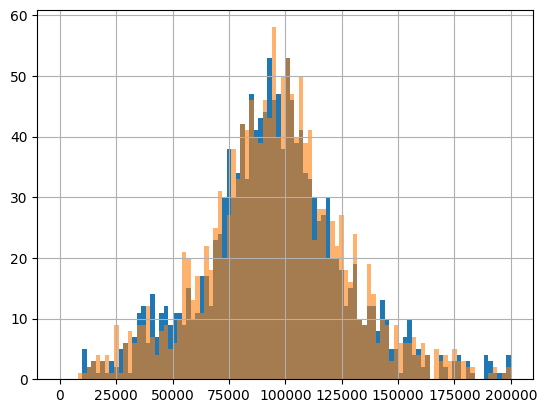

In [104]:
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 7]['price_per_sqmetre'].describe())
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 8]['price_per_sqmetre'].describe())
prise_weekday_month_year[prise_weekday_month_year['month'] == 7]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 8]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.6)

count    1.712000e+03
mean     1.002600e+05
std      6.158493e+04
min      1.255556e+04
25%      7.733705e+04
50%      9.550562e+04
75%      1.154698e+05
max      1.907500e+06
Name: price_per_sqmetre, dtype: float64
count      1877.000000
mean      97016.516795
std       45713.352723
min       14264.264264
25%       77235.772358
50%       93541.202673
75%      111724.137931
max      995983.935743
Name: price_per_sqmetre, dtype: float64


<AxesSubplot: >

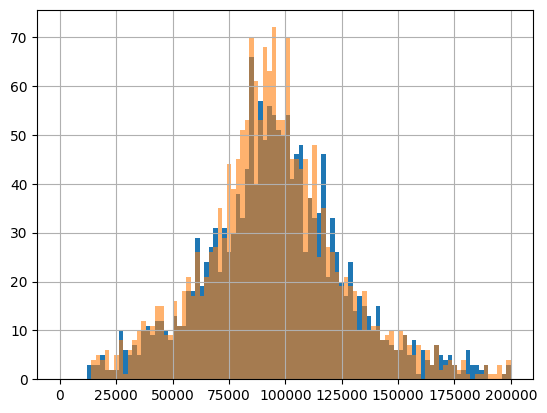

In [105]:
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 9]['price_per_sqmetre'].describe())
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 10]['price_per_sqmetre'].describe())
prise_weekday_month_year[prise_weekday_month_year['month'] == 9]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 10]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.6)

count      2085.000000
mean      99310.823063
std       42841.261795
min       10769.230769
25%       77826.086957
50%       95588.235294
75%      113636.363636
max      658436.213992
Name: price_per_sqmetre, dtype: float64
count      1379.000000
mean      97224.035192
std       47260.971153
min       12250.000000
25%       73439.071932
50%       93668.122271
75%      113752.739015
max      632258.064516
Name: price_per_sqmetre, dtype: float64


<AxesSubplot: >

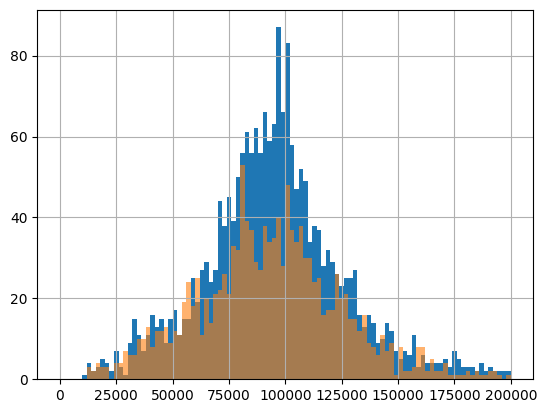

In [106]:
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 11]['price_per_sqmetre'].describe())
print(prise_weekday_month_year[prise_weekday_month_year['month'] == 12]['price_per_sqmetre'].describe())
prise_weekday_month_year[prise_weekday_month_year['month'] == 11]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 12]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.6)

count        18.000000
mean     152549.746993
std       61420.978023
min       45275.590551
25%      133547.488639
50%      160308.894055
75%      170303.033323
max      320979.020979
Name: price_per_sqmetre, dtype: float64
count       401.000000
mean     104728.185473
std       63557.594933
min       19117.647059
25%       77958.894401
50%       91860.465116
75%      113475.177305
max      590694.239291
Name: price_per_sqmetre, dtype: float64


<AxesSubplot: >

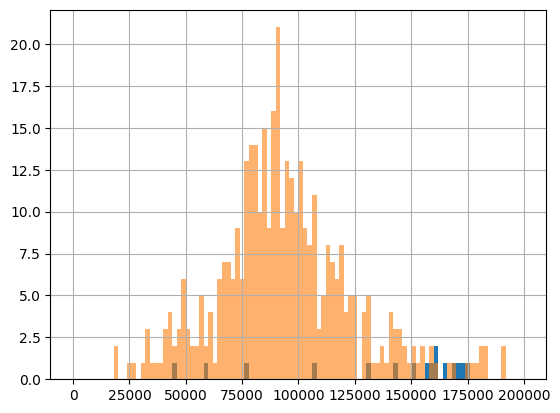

In [107]:
print(prise_weekday_month_year[prise_weekday_month_year['year'] == 2014]['price_per_sqmetre'].describe())
print(prise_weekday_month_year[prise_weekday_month_year['year'] == 2015]['price_per_sqmetre'].describe())
prise_weekday_month_year[prise_weekday_month_year['year'] == 2014]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['year'] == 2015]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.6)

count    1.968000e+03
mean     9.781374e+04
std      4.962069e+04
min      1.158730e+04
25%      7.465635e+04
50%      9.191369e+04
75%      1.102245e+05
max      1.000748e+06
Name: price_per_sqmetre, dtype: float64
count    7.361000e+03
mean     9.697857e+04
std      5.057112e+04
min      1.071429e+04
25%      7.517241e+04
50%      9.210526e+04
75%      1.100260e+05
max      1.907500e+06
Name: price_per_sqmetre, dtype: float64


<AxesSubplot: >

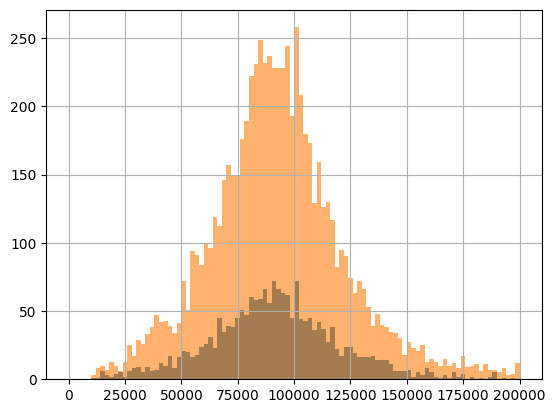

In [108]:
print(prise_weekday_month_year[prise_weekday_month_year['year'] == 2016]['price_per_sqmetre'].describe())
print(prise_weekday_month_year[prise_weekday_month_year['year'] == 2017]['price_per_sqmetre'].describe())
prise_weekday_month_year[prise_weekday_month_year['year'] == 2016]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['year'] == 2017]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.6)

count    8.205000e+03
mean     9.773543e+04
std      4.499576e+04
min      7.962963e+03
25%      7.604895e+04
50%      9.556314e+04
75%      1.144860e+05
max      1.736842e+06
Name: price_per_sqmetre, dtype: float64
count    2.751000e+03
mean     1.074674e+05
std      5.810965e+04
min      1.118349e+02
25%      8.333333e+04
50%      1.037037e+05
75%      1.241667e+05
max      1.542605e+06
Name: price_per_sqmetre, dtype: float64


<AxesSubplot: >

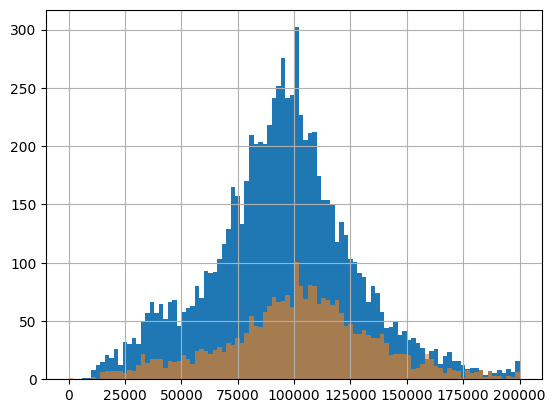

In [109]:
print(prise_weekday_month_year[prise_weekday_month_year['year'] == 2018]['price_per_sqmetre'].describe())
print(prise_weekday_month_year[prise_weekday_month_year['year'] == 2019]['price_per_sqmetre'].describe())
prise_weekday_month_year[prise_weekday_month_year['year'] == 2018]['price_per_sqmetre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['year'] == 2019]['price_per_sqmetre'].hist(bins=100, range=(0,200000), alpha=0.6)

<h3>Huge difference between year 2014 and year 2015 might be due to big inflation as a result of sanctions imposed on Russia after Crimea's anexation, which was mitigated by an enormous increase in interest rate
.In the following years the price slightly increases, that might also have been caused by inflation
</h3>


<h2>Now we shall take a look at 10 biggest localities and estimate their data</h2>

In [110]:
top_10 = df['locality_name'].value_counts()[:10]
top_10 = top_10.index

In [111]:
top_10_mean = (df
               .query('locality_name in @top_10')
               .pivot_table(index='locality_name', values='price_per_sqmetre', aggfunc='mean')
               .sort_values('price_per_sqmetre', ascending=False)
            
)
top_10_mean

,price_per_sqmetre
locality_name,
Санкт-Петербург,114484.443158
Пушкин,102388.948245
деревня Кудрово,92556.338153
посёлок Парголово,89360.470263
посёлок Мурино,85954.245088
посёлок Шушары,78826.329920
Колпино,75261.755275
Всеволожск,68953.289110
Гатчина,68723.309638


<AxesSubplot: xlabel='locality_name'>

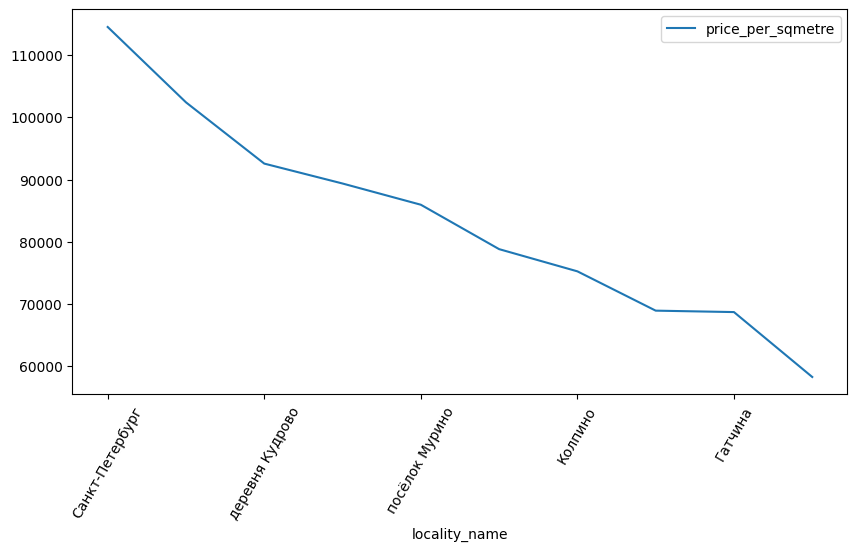

In [112]:
top_10_mean.plot(kind='line', rot=60, figsize=(10,5))

In [113]:
df['citycenters_km'] = round(df['cityCenters_nearest'] / 1000, 0)
df['citycenters_km'] = df['citycenters_km'].astype('int', errors='ignore')

df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['citycenters_km'].notna()), 'citycenters_km'].apply(round)
spb_data = df.query('locality_name == "Санкт-Петербург"')
spb_center_nearest = spb_data.pivot_table(index='citycenters_km', values=['price_per_sqmetre', 'last_price'], aggfunc='median')
spb_center_nearest.head()

C:\Users\vblei\AppData\Local\Temp\ipykernel_4260\1254530364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['citycenters_km'] = round(df['cityCenters_nearest'] / 1000, 0)
C:\Users\vblei\AppData\Local\Temp\ipykernel_4260\1254530364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['citycenters_km'] = df['citycenters_km'].astype('int', errors='ignore')


,last_price,price_per_sqmetre
citycenters_km,,
0.0,13900000,144957.983193
1.0,12000000,128398.791541
2.0,10000000,122448.979592
3.0,8400000,111273.792094
4.0,9000000,118500.000000


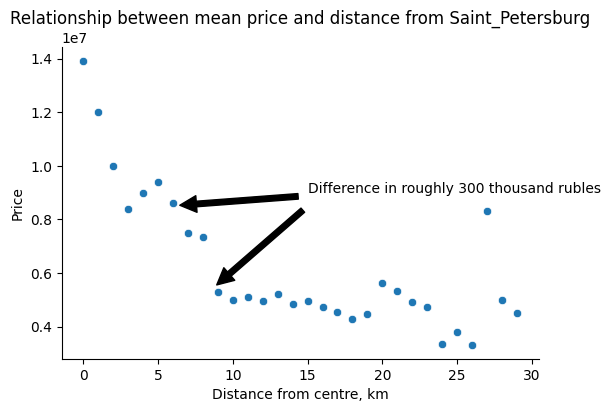

In [114]:
sns.relplot(x=spb_center_nearest.index, y='last_price', data=spb_center_nearest, height=4, aspect=1.4)
plt.annotate('Difference in roughly 300 thousand rubles', xy=(6, 8510000), xytext=(15, 9000000),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('', xy=(8.6, 5400000), xytext=(15, 8500000),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Relationship between mean price and distance from Saint_Petersburg')
plt.ylabel('Price')
plt.xlabel('Distance from centre, km')
plt.show()

<h2> After taking a look at the graph, we notice, that there is a somewhat big gap in price between 6th and 8th kilometer, let us assume that city centre is area of 7 kilometre in radius</h2>

In [115]:
spb_data['kilometers_from_center'] = (spb_data['cityCenters_nearest']/1000).round()

C:\Users\vblei\AppData\Local\Temp\ipykernel_4260\1152016182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['kilometers_from_center'] = (spb_data['cityCenters_nearest']/1000).round()


In [116]:
SPB_center = spb_data.query('kilometers_from_center <= 7')
len(SPB_center)

2895

count    2895.000000
mean       91.762276
std        59.313664
min        12.000000
25%        56.000000
50%        77.600000
75%       108.450000
max       631.200000
Name: total_area, dtype: float64


(12.0, 187.125)

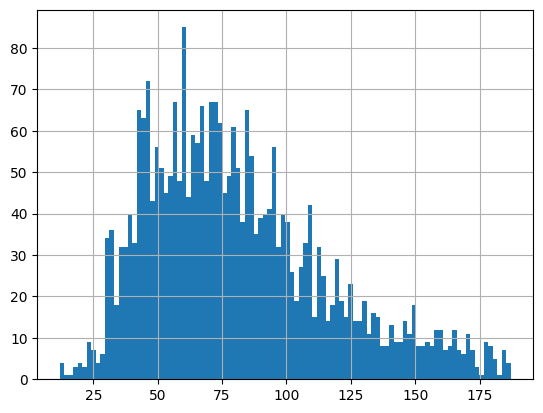

In [117]:
make_hist_for_each_parameter(SPB_center['total_area'])

As can be seen from the graph, most of the flats in the centre have <b>total area</b> in range from 40 to 100

count    2.895000e+03
mean     1.451855e+05
std      9.537651e+04
min      1.534527e+04
25%      1.000000e+05
50%      1.236364e+05
75%      1.557924e+05
max      1.907500e+06
Name: price_per_sqmetre, dtype: float64


(16311.40973498342, 239480.98377502762)

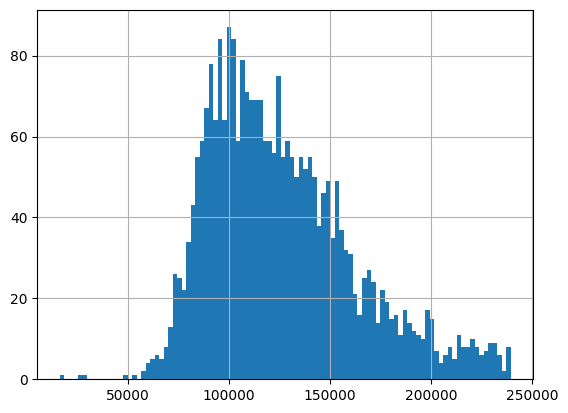

In [118]:
make_hist_for_each_parameter(SPB_center['price_per_sqmetre'])

Price per square meter ranges from roughly <b> 80000 to 140000 </b> in the centre of the city

count    2895.000000
mean        4.205872
std         3.022908
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        25.000000
Name: floor, dtype: float64


(1.0, 9.5)

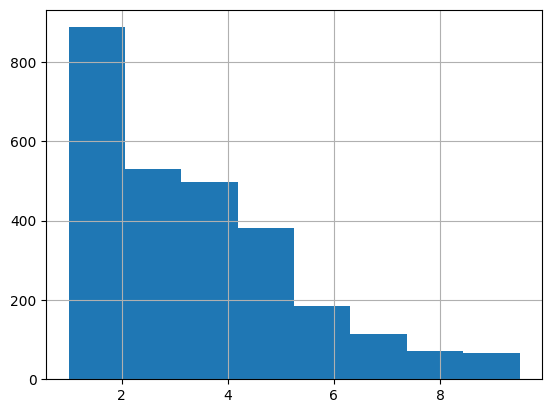

In [119]:
make_hist_for_each_parameter(SPB_center['floor'])

The majority of flats are placed between 2 and 4 floors

count    2895.00000
mean        7.08152
std         3.90863
min         0.00000
25%         5.00000
50%         6.00000
75%         8.00000
max        25.00000
Name: floors_total, dtype: float64


(0.5, 12.5)

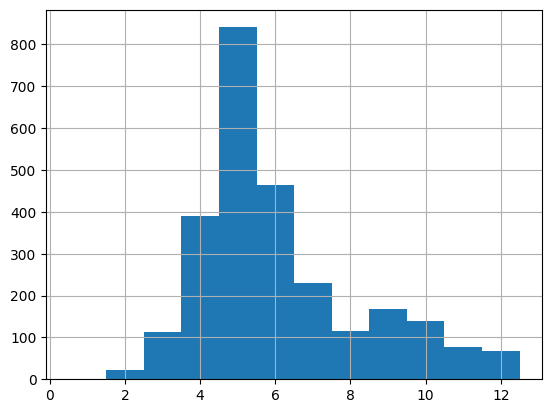

In [120]:
make_hist_for_each_parameter(SPB_center['floors_total'])

the buidlings tend to have no more than 6 stores

count    2895.000000
mean        2.812435
std         1.428696
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64


(1.0, 4.5)

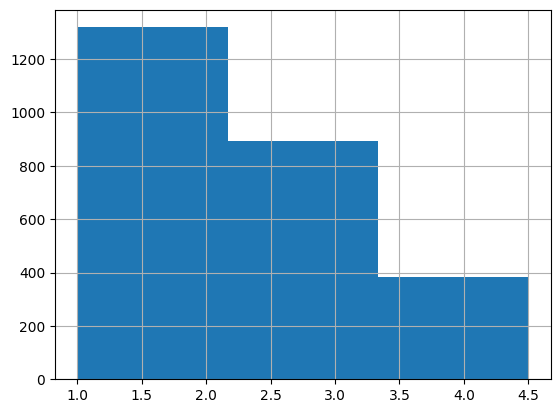

In [121]:
make_hist_for_each_parameter(SPB_center['rooms'])

count    2895.000000
mean        2.951724
std         0.791800
min         2.400000
25%         2.650000
50%         2.800000
75%         3.120000
max        32.000000
Name: ceiling_height, dtype: float64


(2.4, 3.825)

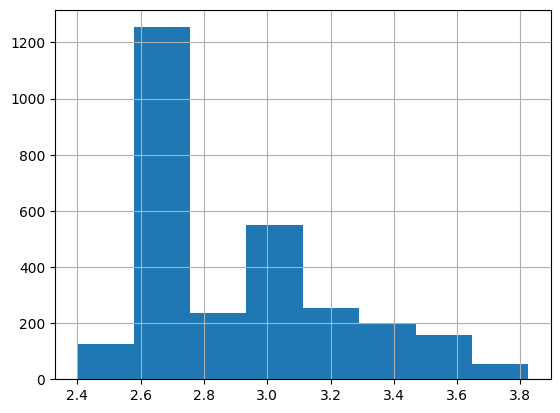

In [122]:
make_hist_for_each_parameter(SPB_center['ceiling_height'], 8)

<b> ceiling height </b> is is not very big, the majority of flats tend to have between 2,6 and 3 meters

In [123]:
area_price_rooms = SPB_center.loc[:,['total_area', 'rooms', 'price_per_sqmetre', 'ceiling_height']]
area_price_rooms.corr()

,total_area,rooms,price_per_sqmetre,ceiling_height
total_area,1.000000,0.739973,0.237801,0.104172
rooms,0.739973,1.000000,-0.001961,0.081124
price_per_sqmetre,0.237801,-0.001961,1.000000,0.032568
ceiling_height,0.104172,0.081124,0.032568,1.000000


array([[<AxesSubplot: xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot: xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot: xlabel='price_per_sqmetre', ylabel='total_area'>,
        <AxesSubplot: xlabel='ceiling_height', ylabel='total_area'>],
       [<AxesSubplot: xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot: xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot: xlabel='price_per_sqmetre', ylabel='rooms'>,
        <AxesSubplot: xlabel='ceiling_height', ylabel='rooms'>],
       [<AxesSubplot: xlabel='total_area', ylabel='price_per_sqmetre'>,
        <AxesSubplot: xlabel='rooms', ylabel='price_per_sqmetre'>,
        <AxesSubplot: xlabel='price_per_sqmetre', ylabel='price_per_sqmetre'>,
        <AxesSubplot: xlabel='ceiling_height', ylabel='price_per_sqmetre'>],
       [<AxesSubplot: xlabel='total_area', ylabel='ceiling_height'>,
        <AxesSubplot: xlabel='rooms', ylabel='ceiling_height'>,
        <AxesSubplot: xlabel='price_per_sqmetre', ylabel='

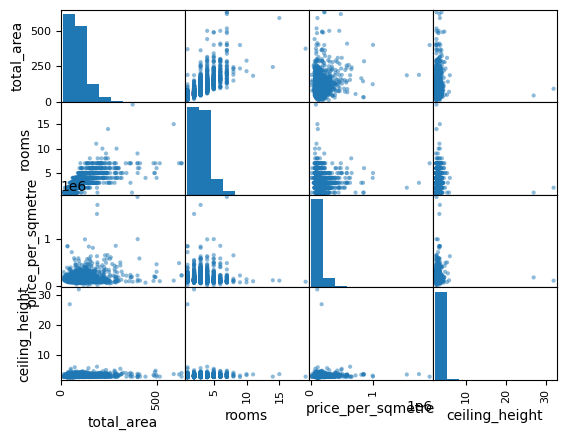

In [124]:
pd.plotting.scatter_matrix(area_price_rooms)

Total area and the number of rooms show a very significant positive correlation, let us visualise this

array([[<AxesSubplot: title={'center': 'total_area'}>]], dtype=object)

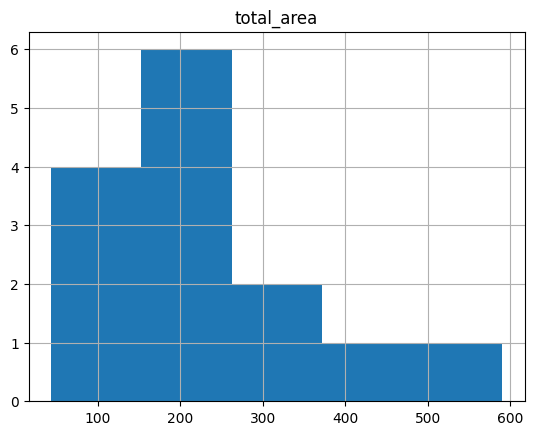

In [125]:
SPB_center.pivot_table(index='rooms', values='total_area').hist(bins=5)


In [126]:
(
    SPB_center.query('locality_name in @top_10')
    .pivot_table(index='locality_name', values=['price_per_sqmetre', 'total_area'], aggfunc=['count', 'mean'])
)

count                         mean           
                price_per_sqmetre total_area price_per_sqmetre total_area
locality_name                                                            
Санкт-Петербург              2895       2895     145185.549763  91.762276

<AxesSubplot: xlabel='cityCenters_nearest', ylabel='price_per_sqmetre'>

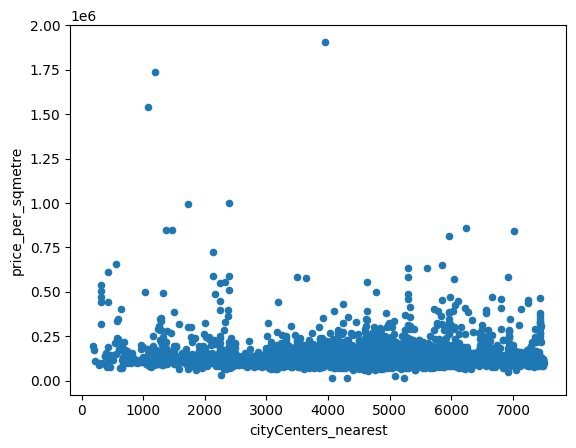

In [136]:
SPB_center['cityCenters_nearest'].corr(df['price_per_sqmetre'])
SPB_center.plot(kind='scatter', y='price_per_sqmetre', x='cityCenters_nearest')

No correlation between price and distance from centre, because we already sliced those flats, that are placed in the centre. That means we did not make any mistakes


,mean,count,median
month,,,
3,149274.962519,326,132844.163577
4,159241.673488,285,126984.126984
1,143479.606863,158,125983.146067
8,139399.637870,222,125000.000000
11,142924.705299,303,125000.000000
9,147254.256146,248,123555.374230
5,136803.094699,147,122580.645161
2,145487.439006,328,121907.894737
10,139025.807401,230,121431.899642


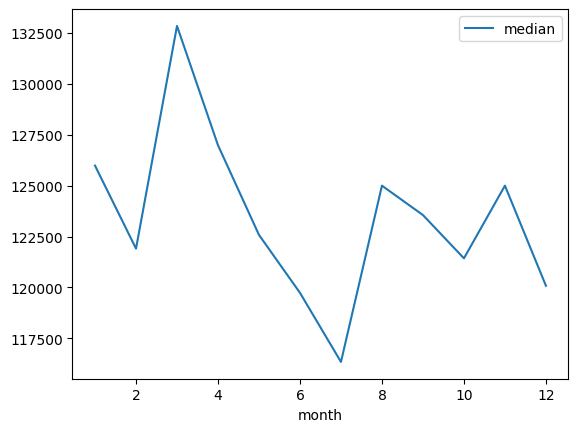

In [138]:
    center_spb_month_exposition = SPB_center.pivot_table(index = 'month', values = 'price_per_sqmetre', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')

center_spb_month_exposition.sort_values('median', ascending = False)

The highest price get in <b>March, April, and August</b> and the lowest price get in <b>June and July</b>

<h1>CONCLUSION</h1>

We have made an analysis of the given real estate relling data - worked out NaN values, changed types of data for a smoother work process. We have calculated and added in the table:
<ol>
    <li>
        <b>Price for square meter</b>
    </li>
    <li>
        <b>Broke down the full data into years, months and weekdays</b>
    </li>
    <li>
        <b>Added floor categories</b>
    </li>
</ol>
We have studied the columns of total area, number of rooms, price, ceiling height. Determined incompleteneses, or errors in the above mentioned parameters. 
We have determined, that it takes from a week through 360 days to sell a flat for it to be a valid value. 
We have found, that the price is affected mostly by:
<ol>
    <li>
        <b>The number of rooms</b>
    </li>
    <li>
        <b>Floor category (the closer to the center of the city, the stronger this factor affects the price)</b>
    </li>
    <li>
        <b>Close proximity to the centre of the city center</b>
    </li>
</ol>
Having found a drastic difference in prices depending on the distance from the city centre we figured, that the centre of the city should lie within 7 kilometer radius of the city
<h2> The main characteristics of the data:</h2>
    <ul>
        <li>
            <b>Many typos in ceilign height, whether it be 27 meters instead of 2.7, or less than 2 meters</b>
        </li>
        <li>
            <b>Possible typos in the number of rooms, many entries where the number of rooms exceeds 7 rooms</b>
        </li>
        <li>
            <b>Data of when a flat gets sold:  many invalid values (400 days+, or less than 7 days)</b>
        </li>
        <li>
            <b>Total area exceeds  150 in some entries</b>
        </li>
    </ul>

In [141]:
df['total_area'].value_counts()

45.00     374
42.00     335
44.00     309
31.00     301
60.00     299
         ... 
52.68       1
87.49       1
203.30      1
112.40      1
133.81      1
Name: total_area, Length: 2006, dtype: int64